<a href="https://colab.research.google.com/github/subhobrata/deeplizard/blob/master/Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [0]:
len(train_set)

60000

In [0]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
sample = next(iter(train_set))

In [0]:
print('len:', len(sample))

len: 2


In [0]:
sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
       

In [0]:
type(sample)

tuple

In [0]:
image,label = sample

In [0]:
print('types:', type(image), type(label))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [0]:
image.shape

torch.Size([1, 28, 28])

In [0]:
label.shape

torch.Size([])

In [0]:
print('squeezed:', image.squeeze().shape)

squeezed: torch.Size([28, 28])


label: tensor(9)


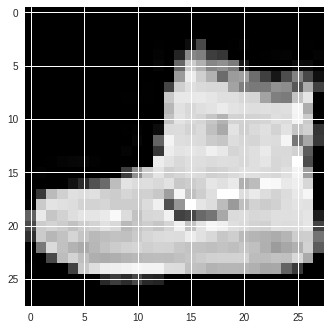

In [0]:
plt.imshow(image.squeeze(), cmap="gray")
print('label:', label)

In [0]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [0]:
batch = next(iter(display_loader))

In [0]:
print('len:', len(batch))

len: 2


In [0]:
images, labels = batch

In [0]:
print('types:', type(images), type(labels))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [0]:
print('shapes:', images.shape, labels.shape)

shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [0]:
images[0].shape

torch.Size([1, 28, 28])

In [0]:
labels[0]

tensor(9)

In [0]:
grid = torchvision.utils.make_grid(images, nrow=10)

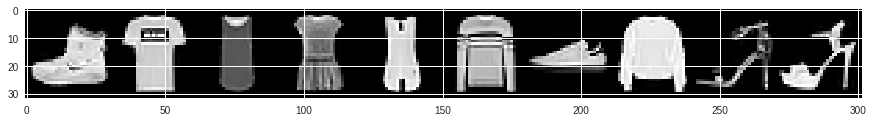

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [0]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [0]:
class Lizard: #class declaration
    def __init__(self, name): #class constructor (code)
        self.name = name #attribute (data)
    
    def set_name(self, name): #method declaration (code)
        self.name = name #method implementation (code

In [0]:
lizard = Lizard('deep')

In [0]:
print(lizard.name)

deep


In [0]:
lizard.set_name('lizard')

In [0]:
print(lizard.name)

lizard


In [0]:
class Network:
    def __init__(self):
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

In [0]:
import torch.nn as nn

In [0]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network, self).__init__() # line 3
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        return t